In [27]:
# Lab 7 Learning rate and Evaluation
import tensorflow as tf

In [28]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = '0' # Set to -1 if CPU should be used CPU = -1 , GPU = 0

gpus = tf.config.experimental.list_physical_devices('GPU')
cpus = tf.config.experimental.list_physical_devices('CPU')

if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)
elif cpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        logical_cpus= tf.config.experimental.list_logical_devices('CPU')
        print(len(cpus), "Physical CPU,", len(logical_cpus), "Logical CPU")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [29]:
learning_rate = 0.001
batch_size = 30 #100 reduce batch_size
training_epochs = 15
nb_classes = 10

In [30]:
mnist = tf.keras.datasets.mnist

In [31]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# normalizing data
x_train, x_test = x_train / 255.0, x_test / 255.0

In [32]:
# change data shape
print(x_train.shape)  # (60000, 28, 28)
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])

(60000, 28, 28)


In [33]:
# change result to one-hot encoding
# in tf1, one_hot= True in read_data_sets("MNIST_data/", one_hot=True)
# took care of it, but here we need to manually convert them
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [34]:
# # Consider an array of 5 labels out of a set of 3 classes {0, 1, 2}:
# array([0, 2, 1, 2, 0])
# `to_categorical` converts this into a matrix with as many columns as there are classes. The number of rows
#  stays the same. to_categorical(labels)
# array([[ 1.,  0.,  0.],
#        [ 0.,  0.,  1.],
#        [ 0.,  1.,  0.],
#        [ 0.,  0.,  1.],
#        [ 1.,  0.,  0.]], dtype=float32)

In [35]:
model = tf.keras.Sequential()

In [36]:
model.add(tf.keras.layers.Dense(units=10, input_dim=784, activation='softmax'))

In [37]:
model.compile(loss='categorical_crossentropy', optimizer=tf.optimizers.Adam(0.001), metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [39]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=training_epochs)

Epoch 1/15
2000/2000 [==============================] - 185s 92ms/step - loss: 0.4644 - accuracy: 0.8788
Epoch 2/15
2000/2000 [==============================] - 181s 90ms/step - loss: 0.3023 - accuracy: 0.9154
Epoch 3/15
2000/2000 [==============================] - 179s 90ms/step - loss: 0.2830 - accuracy: 0.9214
Epoch 4/15
2000/2000 [==============================] - 182s 91ms/step - loss: 0.2722 - accuracy: 0.9237
Epoch 5/15
2000/2000 [==============================] - 188s 94ms/step - loss: 0.2664 - accuracy: 0.9259
Epoch 6/15
2000/2000 [==============================] - 189s 94ms/step - loss: 0.2617 - accuracy: 0.9271
Epoch 7/15
2000/2000 [==============================] - 184s 92ms/step - loss: 0.2581 - accuracy: 0.9281
Epoch 8/15
2000/2000 [==============================] - 186s 93ms/step - loss: 0.2548 - accuracy: 0.9294
Epoch 9/15
2000/2000 [==============================] - 186s 93ms/step - loss: 0.2528 - accuracy: 0.9298
Epoch 10/15
2000/2000 [==============================] 

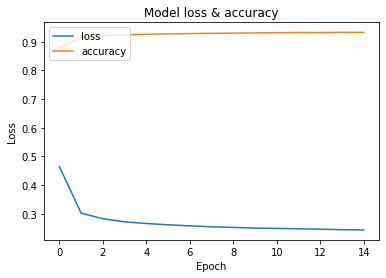

[0.9311000108718872, 0.9320499897003174, 0.9316499829292297, 0.9328666925430298, 0.9323333501815796]


In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('Model loss & accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss', 'accuracy'], loc='upper left')
plt.show()
print(history.history['accuracy'][-5:])

In [41]:
predictions = model.predict(x_test)
print('Prediction: \n', predictions)

Prediction: 
 [[7.2421216e-08 1.7111449e-13 4.3344460e-07 ... 9.9727505e-01
  7.5247935e-06 1.9380248e-04]
 [5.8978774e-05 9.1253725e-07 9.9674267e-01 ... 6.5054128e-21
  1.2002382e-05 3.2982468e-18]
 [4.2710803e-07 9.8426211e-01 9.8432163e-03 ... 6.0938219e-05
  2.3363782e-03 1.5862439e-04]
 ...
 [2.7833311e-09 5.5581423e-10 2.3552420e-06 ... 1.4196006e-03
  6.9020628e-03 1.7174721e-02]
 [1.0899641e-08 2.7181766e-08 1.2283206e-08 ... 4.0712848e-08
  6.3166241e-03 1.8057673e-08]
 [1.3116434e-07 9.1169237e-16 3.7738082e-05 ... 6.3983757e-17
  3.5354677e-09 3.3226069e-13]]


In [42]:
score = model.evaluate(x_train, y_train)
print('Accuracy: ', score[1])

1875/1875 [==============================] - 206s 110ms/step - loss: 0.2352 - accuracy: 0.9365
Accuracy:  0.9365000128746033
